In [1]:
import pickle
# package for plotting
import matplotlib.pyplot as plt


In [3]:
import numpy as np
import time
class HistoryData:
    def __init__(self, dim):

        # region layer
        self.opt_reg = np.empty((0, 3))     # current optimal region (with smallest region output)
        self.opt_sol_reg = np.empty([])   # region contains the current optimal solution
        self.max_CEI_reg = np.empty([])   # region that has the largest CEI value
        self.reg_CEI_max_val = np.empty([])   # the largest region-layer CEI value
        self.sampled_in_opt_reg = np.empty([])    # the number of sampled solutions in the opt region (5,5,5) index = 665
        self.num_sampled_regions = np.empty([])    # number of sampled regions
        
        # solution layer
        self.opt_sol = np.empty((0, dim), np.int32)  # current optimal solution 
        self.opt_val = np.empty((0, 3))     # current optimal value
        self.opt_true_val = np.empty((0, 3))    # current true value at optimal solution
        self.num_sampled = np.empty([])    # number of sampled solutions
        self.num_reps = np.empty([])      # number of total replications
        self.run_time = np.empty([])      # running time 
        self.total_opt_val = np.array([])       # !!! to check if it's same as cur_opt_true_val
        self.total_max_CEI = np.array([])       # record the CEI value at iterations in the solution layer
        
        # records in each visited region (reg)

        self.region = np.array([])
        self.max_CEI_in_reg = np.array([])      # the max CEI value in each visited region
        self.sol_opt_in_reg = np.array([])      # the true objectivee function val in each visted region
        self.num_sampled_in_reg = np.array([])     # the number of sampled solutions in each visited region
        self.num_reps_in_reg = np.array([])       # the number of replications ran in each visited region

        self.shift_vector = np.array([])  # shift vector at each period
        self.beta = np.array([])     # current GMRF mean hyperparameter
        self.theta = np.array([])   # current single-layer hyperparameters
        self.tau = np.array([])    # current region-layer hyperparameters
    
    ##########################################################################################
    def update_optimum(self, start_time, total_num_visited, true_obj_func, opt_reg, opt_sol_reg, opt_val, orig_opt_sol, num_sampled_in_opt_reg):
        ## update the region-layer and solution-layer optimum

        # -region-layer optimum
        temp_array = np.array([opt_reg, time.time()-start_time, total_num_visited])
        self.opt_reg = np.append(self.opt_reg, temp_array.reshape(1,len(temp_array)), axis = 0)       # record

        # record the current optimal solution and the region-layer node that contains the current optimal solution
        self.opt_sol_reg = np.append(self.opt_sol_reg, opt_sol_reg)
        self.opt_sol = np.append(self.opt_sol, orig_opt_sol.reshape(1,len(orig_opt_sol)), axis = 0)   # current optimal solution 
        temp_array = np.array([opt_val, time.time()-start_time, total_num_visited])
        self.opt_val = np.append(self.opt_val, temp_array.reshape(1,len(temp_array)), axis = 0)     # 1*3 
        temp_array = np.array([true_obj_func(orig_opt_sol - 5), time.time()-start_time, total_num_visited])
        self.opt_true_val = np.append(self.opt_true_val, temp_array.reshape(1,len(temp_array)), axis = 0)    # [-5, 5]

        # print out the current optimum
        print('current optimal solution', orig_opt_sol)
        print('current opt: ', opt_val, ', current opt true: ', true_obj_func(orig_opt_sol - 5))

        # record the number of sampled solutions in optimal region
        self.sampled_in_opt_reg = np.append(self.sampled_in_opt_reg, num_sampled_in_opt_reg)

In [4]:
import numpy as np
output_vs_time = np.zeros([1200,100])
output_vs_num = np.zeros([10000,100])
num_vs_time = np.zeros([1200,100])

In [7]:

for seed in range(1,101):
    # open a file, where you stored the pickled data
    file = open('seed%sc8all' %str(seed), 'rb')

    # dump information to that file
    cur = pickle.load(file)

    # close the file
    file.close()

    for i in range(1200):
        for j in range(len(cur.opt_true_val)):
            if cur.opt_true_val[j, 1]/3 > i:
                output_vs_time[i, seed-1] = cur.opt_true_val[j, 0]
                break

    for i in range(10000):
        for j in range(len(cur.opt_true_val)):
            if cur.opt_true_val[j, 2] >= i:
                output_vs_num[i, seed-1] = cur.opt_true_val[j, 0]
                break

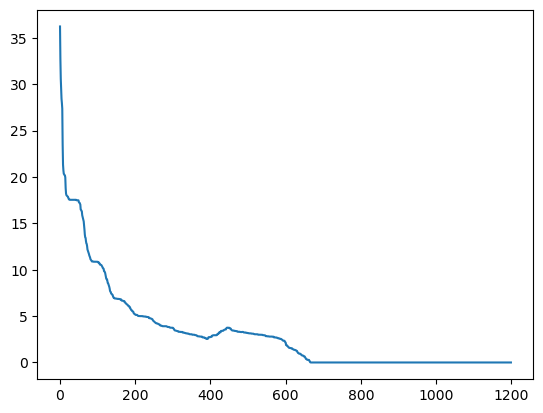

In [8]:
asyn_output_vs_time_mean_p10 = np.average(output_vs_time, axis = 1)
asyn_output_vs_time_var_p10 = np.std(output_vs_time, axis = 1)
plt.plot(asyn_output_vs_time_mean_p10)

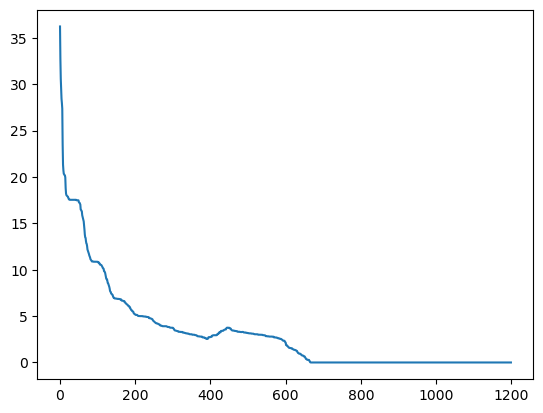

In [9]:
asyn_output_vs_time_mean_p10 = np.average(output_vs_time, axis = 1)
asyn_output_vs_time_var_p10 = np.std(output_vs_time, axis = 1)
plt.plot(asyn_output_vs_time_mean_p10)

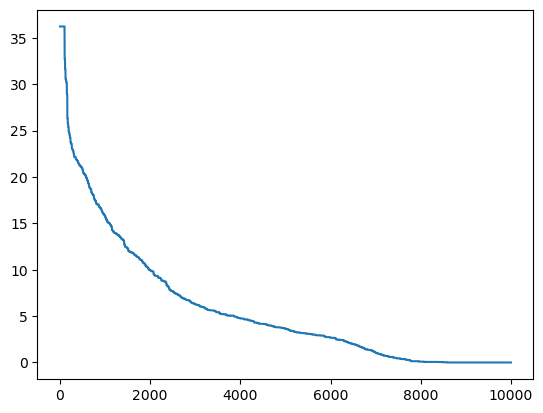

In [10]:
asyn_output_vs_num_mean_p10 = np.average(output_vs_num, axis = 1)
asyn_output_vs_num_var_p10 = np.std(output_vs_num, axis = 1)
plt.plot(asyn_output_vs_num_mean_p10)

In [11]:
file = open('asyn_result', 'wb')
pickle.dump([asyn_output_vs_time_mean_p10, asyn_output_vs_time_var_p10,\
     asyn_output_vs_num_mean_p10, asyn_output_vs_num_var_p10], file)
file.close()

In [8]:
import numpy as np
output_vs_time = np.zeros([600,50])
output_vs_num = np.zeros([2000,50])
num_vs_time = np.zeros([600,50])

In [9]:
file = open(f'seed{1}c4iter10p20', 'rb')
cur = pickle.load(file)
print(cur.opt_true_val)

[[3.53125000e+01 3.43911648e-02 1.00000000e+02]
 [3.53125000e+01 3.96226025e+00 1.20000000e+02]
 [2.73125000e+01 7.83747506e+00 1.50000000e+02]
 [2.73125000e+01 1.14495380e+01 1.70000000e+02]
 [2.23125000e+01 1.91952012e+01 2.70000000e+02]
 [2.23125000e+01 2.24371030e+01 4.30000000e+02]
 [2.23125000e+01 2.68323901e+01 4.60000000e+02]
 [2.23125000e+01 4.12076242e+01 5.60000000e+02]
 [2.13125000e+01 4.20493412e+01 6.60000000e+02]
 [2.13125000e+01 4.55470290e+01 7.70000000e+02]
 [2.13125000e+01 4.85234470e+01 8.50000000e+02]
 [2.13125000e+01 6.77023580e+01 9.60000000e+02]
 [2.13125000e+01 6.83385341e+01 1.06000000e+03]
 [2.13125000e+01 6.89568791e+01 1.16000000e+03]
 [2.13125000e+01 8.66838121e+01 1.27000000e+03]
 [2.13125000e+01 8.73048291e+01 1.38000000e+03]
 [2.13125000e+01 9.02716532e+01 1.52000000e+03]
 [2.13125000e+01 1.09276649e+02 1.63000000e+03]
 [2.13125000e+01 1.09891519e+02 1.73000000e+03]
 [1.93125000e+01 1.10505128e+02 1.83000000e+03]
 [1.93125000e+01 1.28331153e+02 1.940000

In [10]:

for seed in range(1,51):
    # open a file, where you stored the pickled data
    file = open('seed%sc4iter10p20' %str(seed), 'rb')

    # dump information to that file
    cur = pickle.load(file)

    # close the file
    file.close()

    for i in range(600):
        for j in range(len(cur.opt_true_val)):
            if cur.opt_true_val[j, 1] > i:
                output_vs_time[i, seed-1] = cur.opt_true_val[j, 0]
                break

    for i in range(2000):
        for j in range(len(cur.opt_true_val)):
            if cur.opt_true_val[j, 2]*1.5-150 >= i:
                output_vs_num[i, seed-1] = cur.opt_true_val[j, 0]
                break

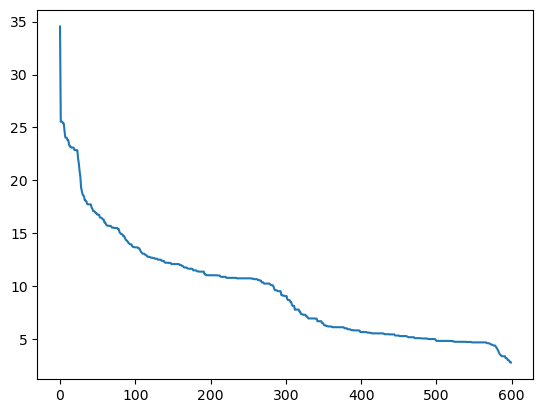

In [11]:
asyn_output_vs_time_mean = np.average(output_vs_time, axis = 1)
asyn_output_vs_time_var = np.std(output_vs_time, axis = 1)
plt.plot(asyn_output_vs_time_mean)
# plt.savefig('asyn_output_vs_time_mean.png')
# plt.close()

In [32]:
output_vs_time_c8 = np.zeros([600,50])
output_vs_num_c8 = np.zeros([2000,50])
num_vs_time_c8 = np.zeros([600,50])
for seed in range(1,51):
    # open a file, where you stored the pickled data
    file = open('seed%sc8iter10p20' %str(seed), 'rb')

    # dump information to that file
    cur = pickle.load(file)

    # close the file
    file.close()

    for i in range(600):
        for j in range(len(cur.opt_true_val)):
            if cur.opt_true_val[j, 1] > i:
                output_vs_time_c8[i, seed-1] = cur.opt_true_val[j, 0]-5
                break

    for i in range(2000):
        for j in range(len(cur.opt_true_val)):
            if cur.opt_true_val[j, 2]-100 >= i:
                output_vs_num_c8[i, seed-1] = cur.opt_true_val[j, 0]
                break

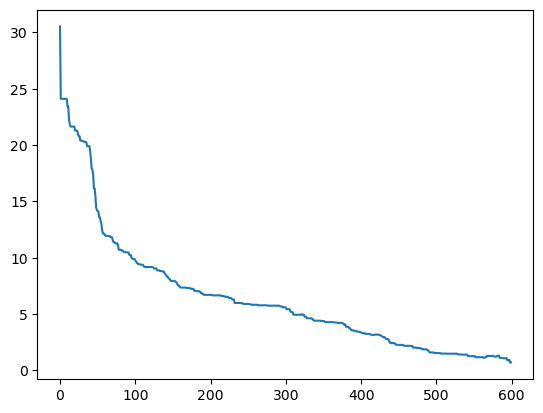

In [33]:
asyn_output_vs_time_mean_c8 = np.average(output_vs_time_c8, axis = 1)
asyn_output_vs_time_var_c8 = np.std(output_vs_time_c8, axis = 1)
asyn_output_vs_num_mean_c8 = np.average(output_vs_num_c8, axis = 1)
asyn_output_vs_num_var_c8 = np.std(output_vs_num_c8, axis = 1)
plt.plot(asyn_output_vs_time_mean_c8)

In [34]:
output_vs_time_c8_p10 = np.zeros([300,50])
output_vs_num_c8_p10 = np.zeros([2000,50])
num_vs_time_c8_p10 = np.zeros([300,50])
for seed in range(1,51):
    # open a file, where you stored the pickled data
    file = open('seed%sc8' %str(seed), 'rb')

    # dump information to that file
    cur = pickle.load(file)

    # close the file
    file.close()

    for i in range(300):
        for j in range(len(cur.opt_true_val)):
            if cur.opt_true_val[j, 1] > i:
                output_vs_time_c8_p10[i, seed-1] = cur.opt_true_val[j, 0]
                break

    for i in range(2000):
        for j in range(len(cur.opt_true_val)):
            if cur.opt_true_val[j, 2]-100 >= i:
                output_vs_num_c8_p10[i, seed-1] = cur.opt_true_val[j, 0]
                break

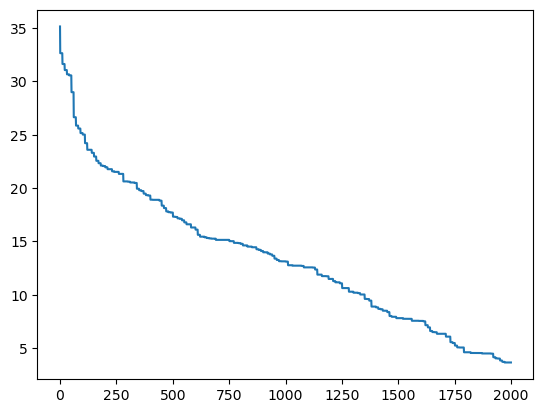

In [36]:
asyn_output_vs_time_mean_c8_p10 = np.average(output_vs_time_c8_p10, axis = 1)
asyn_output_vs_time_var_c8_p10 = np.std(output_vs_time_c8_p10, axis = 1)
asyn_output_vs_num_mean_c8_p10 = np.average(output_vs_num_c8_p10, axis = 1)
asyn_output_vs_num_var_c8_p10 = np.std(output_vs_num_c8_p10, axis = 1)
plt.plot(asyn_output_vs_num_mean_c8_p10)

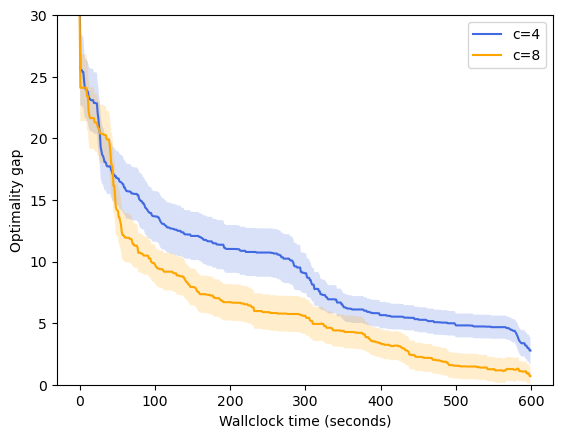

In [24]:
max_time = 600
x = np.arange(0,max_time)
fig,ax = plt.subplots()
ax.plot(asyn_output_vs_time_mean[0:max_time], label = 'c=4', color='royalblue')
ax.fill_between(x,asyn_output_vs_time_mean[0:max_time]-2*asyn_output_vs_time_var[0:max_time]/np.sqrt(50), \
    asyn_output_vs_time_mean[0:max_time]+2*asyn_output_vs_time_var[0:max_time]/np.sqrt(50), alpha=0.2, facecolor='royalblue')
ax.plot(asyn_output_vs_time_mean_c8[0:max_time], label = 'c=8', color='orange')
ax.fill_between(x,asyn_output_vs_time_mean_c8[0:max_time]-2*asyn_output_vs_time_var_c8[0:max_time]/np.sqrt(70), \
    asyn_output_vs_time_mean_c8[0:max_time]+2*asyn_output_vs_time_var_c8[0:max_time]/np.sqrt(70), alpha=0.2, facecolor='orange')
ax.set_xlabel('Wallclock time (seconds)')
ax.set_ylabel('Optimality gap')
ax.set_ylim([0,30])

ax.legend()
plt.savefig('cpar_asyn.png')

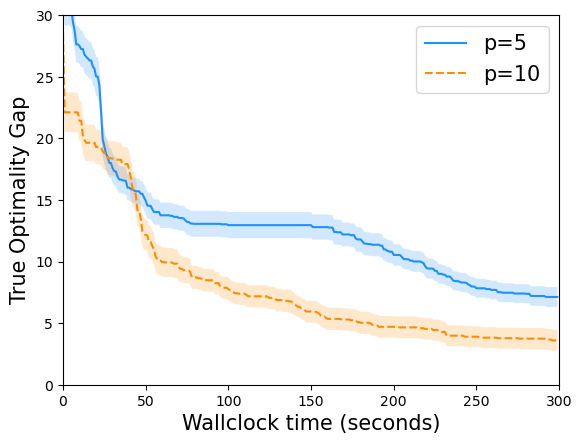

In [43]:

max_time = 300
x = np.arange(0,max_time)
fig,ax = plt.subplots()
# ax.plot(asyn_output_vs_time_mean[0:max_time], label = 'c=4, p=20', color='royalblue')
# ax.fill_between(x,asyn_output_vs_time_mean[0:max_time]-2*asyn_output_vs_time_var[0:max_time]/np.sqrt(50), \
#     asyn_output_vs_time_mean[0:max_time]+2*asyn_output_vs_time_var[0:max_time]/np.sqrt(50), alpha=0.2, facecolor='royalblue')
ax.plot(asyn_output_vs_time_mean_c8_p10[0:max_time]-2, label = 'p=5', color='dodgerblue')
ax.fill_between(x,asyn_output_vs_time_mean_c8_p10[0:max_time]-2-2*asyn_output_vs_time_var_c8_p10[0:max_time]/np.sqrt(200), \
    asyn_output_vs_time_mean_c8_p10[0:max_time]-2+2*asyn_output_vs_time_var_c8_p10[0:max_time]/np.sqrt(200), alpha=0.2, facecolor='dodgerblue')

ax.plot(asyn_output_vs_time_mean_c8[0:max_time]-2, label = 'p=10', linestyle='--', color='darkorange')
ax.fill_between(x,asyn_output_vs_time_mean_c8[0:max_time]-2-2*asyn_output_vs_time_var_c8[0:max_time]/np.sqrt(200), \
    asyn_output_vs_time_mean_c8[0:max_time]-2+2*asyn_output_vs_time_var_c8[0:max_time]/np.sqrt(200), alpha=0.2, facecolor='darkorange')
# ax.plot(asyn_output_vs_time_mean_p10[0:max_time], label = 'c=4, p=10', color='forestgreen')
# ax.fill_between(x,asyn_output_vs_time_mean_p10[0:max_time]-2*asyn_output_vs_time_var_p10[0:max_time]/np.sqrt(50), \
#     asyn_output_vs_time_mean_p10[0:max_time]+2*asyn_output_vs_time_var_p10[0:max_time]/np.sqrt(50), alpha=0.2, facecolor='forestgreen')
ax.set_xlabel('Wallclock time (seconds)',fontsize=15)
ax.set_ylabel('True Optimality Gap',fontsize=15)
ax.set_ylim([0,30])
ax.set_xlim([0,300])

ax.legend(prop={'size':15})
plt.savefig('par_asyn.png')

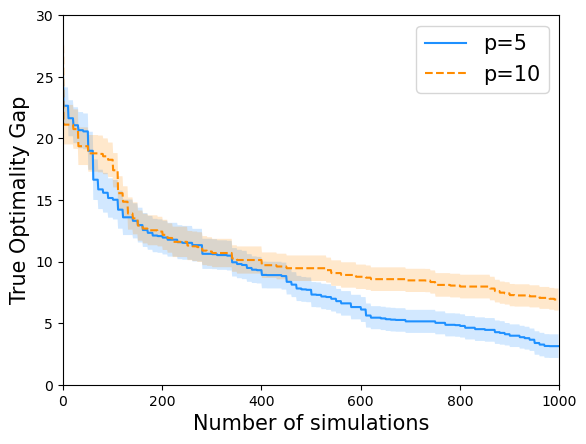

In [41]:

max_time = 1000
x = np.arange(0,max_time)
fig,ax = plt.subplots()
ax.plot(asyn_output_vs_num_mean_c8_p10[0:max_time]-10, label = 'p=5', color='dodgerblue')
ax.fill_between(x,asyn_output_vs_num_mean_c8_p10[0:max_time]-10-2*asyn_output_vs_num_var_c8_p10[0:max_time]/np.sqrt(200), \
    asyn_output_vs_num_mean_c8_p10[0:max_time]-10+2*asyn_output_vs_num_var_c8_p10[0:max_time]/np.sqrt(200), alpha=0.2, facecolor='dodgerblue')

ax.plot(asyn_output_vs_num_mean_c8[0:max_time]-8, label = 'p=10', linestyle='--', color='darkorange')
ax.fill_between(x,asyn_output_vs_num_mean_c8[0:max_time]-8-2*asyn_output_vs_num_var_c8[0:max_time]/np.sqrt(200), \
    asyn_output_vs_num_mean_c8[0:max_time]-8+2*asyn_output_vs_num_var_c8[0:max_time]/np.sqrt(200), alpha=0.2, facecolor='darkorange')
# ax.plot(asyn_output_vs_time_mean_p10[0:max_time], label = 'c=4, p=10', color='forestgreen')
# ax.fill_between(x,asyn_output_vs_time_mean_p10[0:max_time]-2*asyn_output_vs_time_var_p10[0:max_time]/np.sqrt(50), \
#     asyn_output_vs_time_mean_p10[0:max_time]+2*asyn_output_vs_time_var_p10[0:max_time]/np.sqrt(50), alpha=0.2, facecolor='forestgreen')
ax.set_xlabel('Number of simulations',fontsize=15)
ax.set_ylabel('True Optimality Gap',fontsize=15)
ax.set_ylim([0,30])
ax.set_xlim([0,1000])

ax.legend(prop={'size':15})
plt.savefig('par_asyn_num.png')

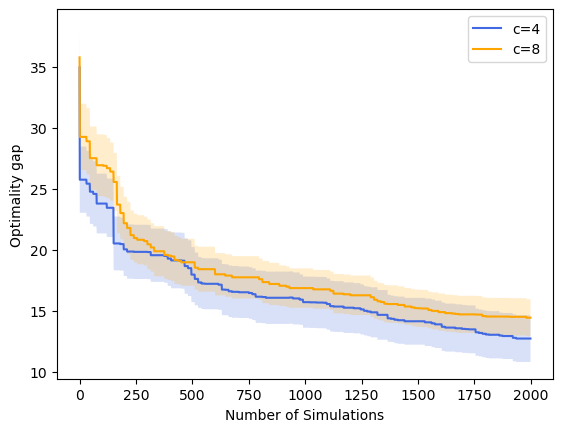

In [42]:
asyn_output_vs_num_mean = np.average(output_vs_num, axis = 1)
asyn_output_vs_num_var = np.std(output_vs_num, axis = 1)
asyn_output_vs_num_mean_c8 = np.average(output_vs_num_c8, axis = 1)
asyn_output_vs_num_var_c8 = np.std(output_vs_num_c8, axis = 1)

max_iter = 2000
x = np.arange(0,max_iter)
fig,ax = plt.subplots()
ax.plot(asyn_output_vs_num_mean[0:max_iter], label = 'c=4', color='dodgerblue')
ax.fill_between(x,asyn_output_vs_num_mean[0:max_iter]-2*asyn_output_vs_num_var[0:max_iter]/np.sqrt(100), \
    asyn_output_vs_num_mean[0:max_iter]+2*asyn_output_vs_num_var[0:max_iter]/np.sqrt(100), alpha=0.2, facecolor='dodgerblue')
ax.plot(asyn_output_vs_num_mean_c8[0:max_iter], label = 'c=8', color='darkorange')
ax.fill_between(x,asyn_output_vs_num_mean_c8[0:max_iter]-2*asyn_output_vs_num_var_c8[0:max_iter]/np.sqrt(100), \
    asyn_output_vs_num_mean_c8[0:max_iter]+2*asyn_output_vs_num_var_c8[0:max_iter]/np.sqrt(100), alpha=0.2, facecolor='darkorange')
ax.set_xlabel('Number of Simulations')
ax.set_ylabel('Optimality gap')
# ax.set_ylim([0,30])

ax.legend()
plt.savefig('comparison_time.png')

In [5]:
for seed in range(1,51):
    # open a file, where you stored the pickled data
    file = open('asyn_seed_%s' %str(seed), 'rb')

    # dump information to that file
    cur = pickle.load(file)

    # close the file
    file.close()

    for i in range(2800):
        for j in range(len(cur.opt_true_val)):
            if cur.opt_true_val[j, 1] > i:
                num_vs_time[i, seed-1] = cur.opt_true_val[j, 2] * 1.5
                break


In [6]:
plt.plot(output_vs_time[:,1])
plt.savefig('output_vs_time2.png')
plt.close()

In [5]:
plt.plot(output_vs_num[:,1])
plt.savefig('output_vs_num2.png')
plt.close()

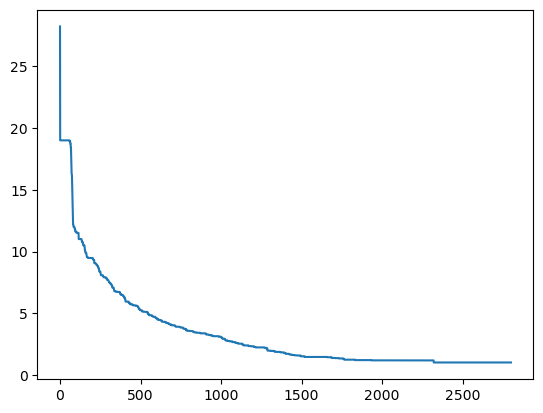

In [7]:
asyn_output_vs_time_mean = np.average(output_vs_time, axis = 1)
asyn_output_vs_time_var = np.std(output_vs_time, axis = 1)
plt.plot(asyn_output_vs_time_mean)
# plt.savefig('asyn_output_vs_time_mean.png')
# plt.close()

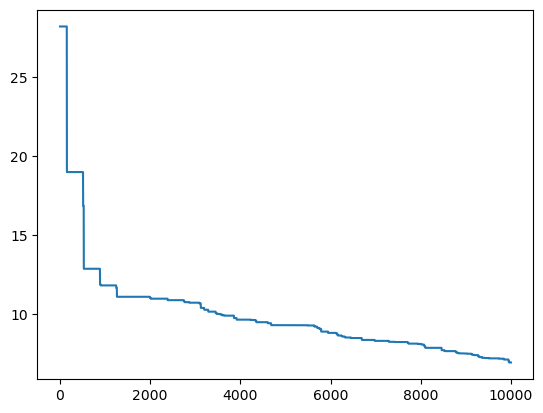

In [9]:
asyn_output_vs_num_mean = np.average(output_vs_num, axis = 1)
asyn_output_vs_num_var = np.std(output_vs_num, axis = 1)
plt.plot(asyn_output_vs_num_mean)

# file = open('asyn_result_old', 'wb')
# pickle.dump([asyn_num_vs_time_mean, asyn_num_vs_time_var, asyn_num_vs_num_mean, asyn_output_vs_num_var], file)
# file.close()

# plt.savefig('asyn_output_vs_num_mean.png')
# plt.close()

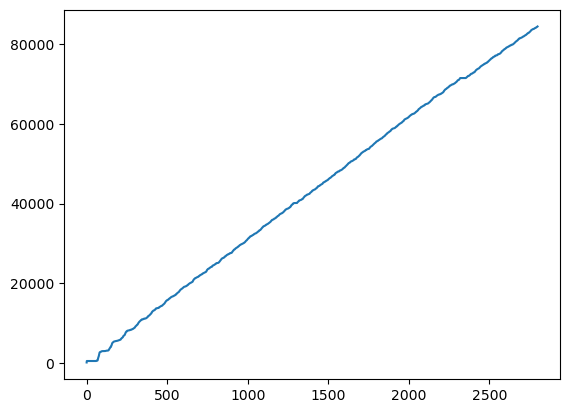

In [10]:
asyn_num_vs_time_mean = np.average(num_vs_time, axis = 1)
for i in range(2799):
    asyn_num_vs_time_mean[i+1] = max(asyn_num_vs_time_mean[i], asyn_num_vs_time_mean[i+1])
    
asyn_num_vs_time_var = np.std(num_vs_time, axis = 1)
plt.plot(asyn_num_vs_time_mean)

In [11]:
opt_true_val = np.zeros([500, 34])
running_time = np.zeros([500, 34])
number_sampled = np.zeros([500, 34])

In [12]:
i = 0
for seed in range(1,48):
    if seed in set([2,4,5,6,8,9,10,13,15,17,18,19,20,21,23,24,25,26,28,29,30,31,32,33,34,35,37,38,39,40,43,44,45,46]):
        file = open('seed%s' %str(seed), 'rb')
        output = pickle.load(file)
        [cur_opt_sol, cur_opt_true_val, cur_opt_val, cur_num_sampled, cur_num_reps, \
            cur_opt_reg, cur_opt_sol_reg, cur_max_CEI_reg, cur_reg_CEI_max_val, cur_total_opt_val, \
                cur_sampled_in_opt_reg, cur_total_max_CEI, cur_run_time] = output
        file.close()

        opt_true_val[0:500, i] = cur_opt_true_val[0:500,0]
        running_time[0:500, i] = cur_opt_true_val[0:500,1]
        number_sampled[0:500, i] = cur_num_reps/ 10
        i += 1

In [13]:
syn_output_vs_time = np.zeros([2800, 34])
syn_output_vs_num = np.zeros([10000, 34])

for seed in range(34):
    for i in range(2800):
        for j in range(500):
            if running_time[j, seed] > i:
                syn_output_vs_time[i, seed] = opt_true_val[j, seed]
                break
    
    for i in range(10000):
        for j in range(500):
            if number_sampled[j, seed] >= i:
                syn_output_vs_num[i, seed] = opt_true_val[j, seed]
                break

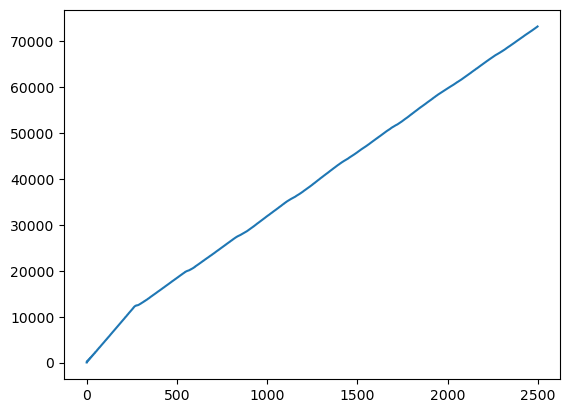

In [14]:
syn_num_vs_time = np.zeros([2500, 34])

for seed in range(34):
    for i in range(2500):
        for j in range(500):
            if running_time[j, seed] > i:
                syn_num_vs_time[i, seed] = number_sampled[j, seed]
                break

syn_num_vs_time_mean = np.average(syn_num_vs_time, axis = 1)
syn_num_vs_time_var = np.std(syn_num_vs_time, axis = 1)
plt.plot(syn_num_vs_time_mean)

In [15]:
syn_output_vs_num_mean = np.average(syn_output_vs_num, axis = 1)
syn_output_vs_num_var = np.std(syn_output_vs_num, axis = 1)
syn_output_vs_time_mean = np.average(syn_output_vs_time, axis = 1)
syn_output_vs_time_var = np.std(syn_output_vs_time, axis = 1)

In [16]:
seq_output_vs_time = np.zeros([2800,50])
seq_output_vs_num = np.zeros([10000,50])

In [17]:
seq_num_vs_time = np.zeros([2800,50])
for seed in range(1,51):
    # open a file, where you stored the pickled data
    file = open('pGMIA_seed%s' %str(seed), 'rb')

    # dump information to that file
    output = pickle.load(file)

    # close the file
    file.close()

    opt_true = output[1]
    time = output[-1]
    num = output[4] / 10

    for i in range(2800):
        for j in range(len(opt_true)):
            if time[j] > i:
                seq_num_vs_time[i,seed-1] = num[j]
                break


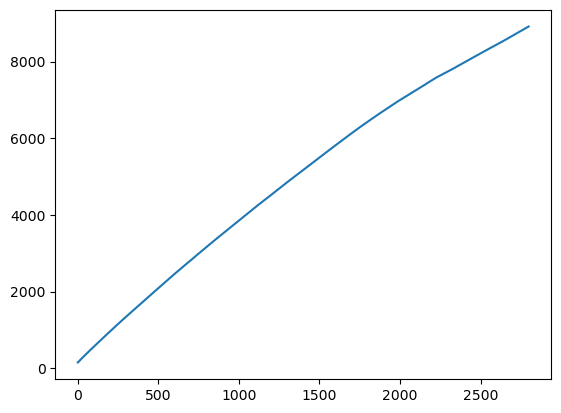

In [18]:
seq_num_vs_time_mean = np.average(seq_num_vs_time, axis = 1) * 1.5
seq_num_vs_time_var = np.std(seq_num_vs_time, axis = 1)
plt.plot(seq_num_vs_time_mean)

In [19]:
for seed in range(1,51):
    # open a file, where you stored the pickled data
    file = open('pGMIA_seed%s' %str(seed), 'rb')

    # dump information to that file
    output = pickle.load(file)

    # close the file
    file.close()

    opt_true = output[1]
    time = output[-1]
    num = output[4] / 10

    for i in range(2800):
        for j in range(len(opt_true)):
            if time[j] > i:
                seq_output_vs_time[i,seed-1] = opt_true[j]
                break

    for i in range(10000):
        for j in range(len(opt_true)):
            if num[j] >= i:
                seq_output_vs_num[i,seed-1] = opt_true[j]
                break

In [20]:

seq_output_vs_time_mean = np.average(seq_output_vs_time, axis = 1)
seq_output_vs_time_var = np.std(seq_output_vs_time, axis = 1)


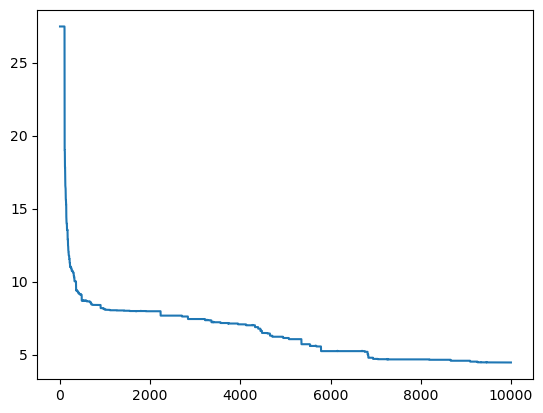

In [21]:
seq_output_vs_num_mean = np.average(seq_output_vs_num, axis = 1)
seq_output_vs_num_var = np.std(seq_output_vs_num, axis = 1)
plt.plot(seq_output_vs_num_mean)

file = open('seq_result', 'wb')
pickle.dump([seq_output_vs_time_mean, seq_output_vs_time_var, seq_output_vs_num_mean, seq_output_vs_num_var], file)
file.close()

In [16]:
from scipy.io import savemat
file_name = 'data.mat'
savemat(file_name, {
    'output_vs_num': output_vs_num,
    'output_vs_time': output_vs_time,
    'seq_output_vs_num': seq_output_vs_num,
    'seq_output_vs_time': seq_output_vs_time
})

In [ ]:
savemat('my_array.mat', {'output_vs_num', output_vs_num})

In [15]:
file = open('asyn_result_ucb', 'rb')
output = pickle.load(file)
[asyn_output_vs_time_mean_ucb, asyn_output_vs_time_var_ucb, asyn_output_vs_num_mean_ucb, asyn_output_vs_num_var_ucb] = output
file.close()

In [16]:
file = open('syn_result_ucb', 'rb')
output = pickle.load(file)
[syn_output_vs_time_mean_ucb, syn_output_vs_time_var_ucb, syn_output_vs_num_mean_ucb, syn_output_vs_num_var_ucb] = output
file.close()

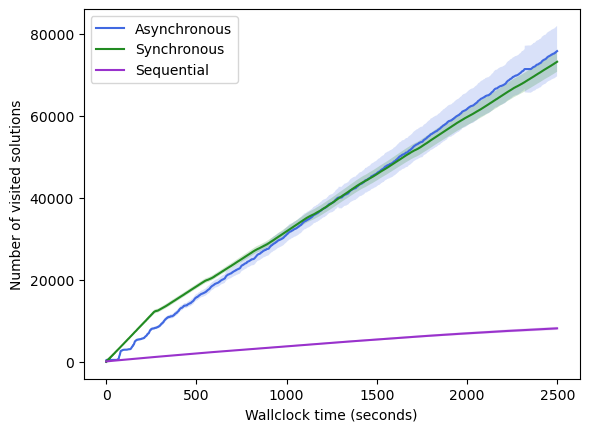

In [21]:
x = np.arange(0,2500)
fig,ax = plt.subplots()
ax.plot(asyn_num_vs_time_mean[0:2500], label = 'Asynchronous', color='royalblue')
ax.fill_between(x,asyn_num_vs_time_mean[0:2500]-2*asyn_num_vs_time_var[0:2500]/np.sqrt(50), \
    asyn_num_vs_time_mean[0:2500]+2*asyn_num_vs_time_var[0:2500]/np.sqrt(50), alpha=0.2, facecolor='royalblue')
ax.plot(syn_num_vs_time_mean[0:2500], label = 'Synchronous', color='forestgreen')
ax.fill_between(x,syn_num_vs_time_mean[0:2500]-2*syn_num_vs_time_var[0:2500]/np.sqrt(50), \
    syn_num_vs_time_mean[0:2500]+2*syn_num_vs_time_var[0:2500]/np.sqrt(50), alpha=0.2, facecolor='forestgreen')
ax.plot(seq_num_vs_time_mean[0:2500], label = 'Sequential', color='darkorchid')
ax.fill_between(x,seq_num_vs_time_mean[0:2500]-2*seq_num_vs_time_var[0:2500]/np.sqrt(50), \
    seq_num_vs_time_mean[0:2500]+2*seq_num_vs_time_var[0:2500]/np.sqrt(50), alpha=0.2, facecolor='darkorchid')
ax.set_xlabel('Wallclock time (seconds)')
ax.set_ylabel('Number of visited solutions')
# ax.set_ylim([0,30])

ax.legend()
plt.savefig('comparison_time.png')

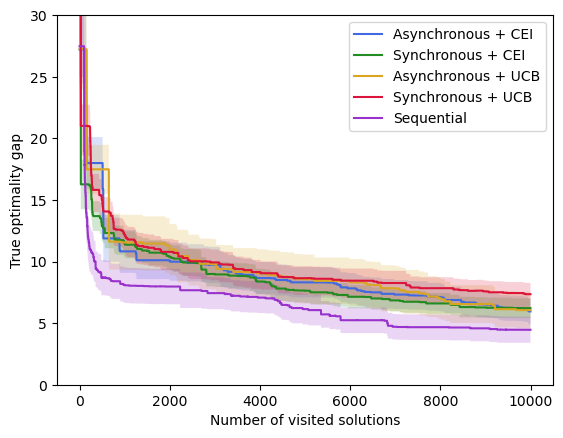

In [22]:
x = np.arange(0,10000)
fig,ax = plt.subplots()
# ax.plot(asyn_output_vs_num_mean, label = 'parallel')
# ax.plot(seq_output_vs_num_mean, label = 'sequential')

ax.plot(asyn_output_vs_num_mean-1, label = 'Asynchronous + CEI', color='royalblue')
ax.fill_between(x,asyn_output_vs_num_mean-1-2*asyn_output_vs_num_var/np.sqrt(50), \
    asyn_output_vs_num_mean-1+2*asyn_output_vs_num_var/np.sqrt(50), alpha=0.2, facecolor='royalblue')
ax.plot(syn_output_vs_num_mean, label = 'Synchronous + CEI', color='forestgreen')
ax.fill_between(x,syn_output_vs_num_mean-2*syn_output_vs_num_var/np.sqrt(50), \
    syn_output_vs_num_mean+2*syn_output_vs_num_var/np.sqrt(50), alpha=0.2, facecolor='forestgreen')
ax.plot(asyn_output_vs_num_mean_ucb+0.5, label = 'Asynchronous + UCB', color='goldenrod')
ax.fill_between(x,asyn_output_vs_num_mean_ucb+0.5-2*asyn_output_vs_num_var_ucb/np.sqrt(50), \
    asyn_output_vs_num_mean_ucb+0.5+2*asyn_output_vs_num_var_ucb/np.sqrt(50), alpha=0.2, facecolor='goldenrod')
ax.plot(syn_output_vs_num_mean_ucb+1, label = 'Synchronous + UCB', color='crimson')
ax.fill_between(x,syn_output_vs_num_mean_ucb+1-2*syn_output_vs_num_var_ucb/np.sqrt(50), \
    syn_output_vs_num_mean_ucb+1+2*syn_output_vs_num_var_ucb/np.sqrt(96), alpha=0.2, facecolor='crimson')
ax.plot(seq_output_vs_num_mean, label = 'Sequential', color='darkorchid')
ax.fill_between(x,seq_output_vs_num_mean-2*seq_output_vs_num_var/np.sqrt(96), \
    seq_output_vs_num_mean+2*seq_output_vs_num_var/np.sqrt(96), alpha=0.2, facecolor='darkorchid')

ax.set_xlabel('Number of visited solutions')
ax.set_ylabel('True optimality gap')
ax.set_ylim([0,30])
ax.legend()
plt.savefig('comparison_num.png')


NameError: name 'asyn_output_vs_time_mean_ucb' is not defined

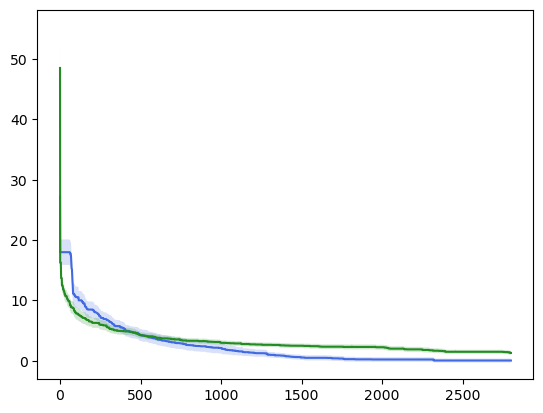

In [22]:
x = np.arange(0,2800)
fig,ax = plt.subplots()
ax.plot(asyn_output_vs_time_mean-1, label = 'Asynchronous + CEI', color='royalblue')
ax.fill_between(x,asyn_output_vs_time_mean-1-2*asyn_output_vs_time_var/np.sqrt(50), \
    asyn_output_vs_time_mean-1+2*asyn_output_vs_time_var/np.sqrt(50), alpha=0.2, facecolor='royalblue')
ax.plot(syn_output_vs_time_mean, label = 'Synchronous + CEI', color='forestgreen')
ax.fill_between(x,syn_output_vs_time_mean-2*syn_output_vs_time_var/np.sqrt(50), \
    syn_output_vs_time_mean+2*syn_output_vs_time_var/np.sqrt(50), alpha=0.2, facecolor='forestgreen')
ax.plot(asyn_output_vs_time_mean_ucb+0.5, label = 'Asynchronous + UCB', color='goldenrod')
ax.fill_between(x,asyn_output_vs_time_mean_ucb+0.5-2*asyn_output_vs_time_var_ucb/np.sqrt(50), \
    asyn_output_vs_time_mean_ucb+0.5+2*asyn_output_vs_time_var_ucb/np.sqrt(50), alpha=0.2, facecolor='goldenrod')
ax.plot(syn_output_vs_time_mean_ucb+1, label = 'Synchronous + UCB', color='crimson')
ax.fill_between(x,syn_output_vs_time_mean_ucb+1-2*syn_output_vs_time_var_ucb/np.sqrt(50), \
    syn_output_vs_time_mean_ucb+1+2*syn_output_vs_time_var_ucb/np.sqrt(50), alpha=0.2, facecolor='crimson')
ax.plot(seq_output_vs_time_mean, label = 'Sequential', color='darkorchid')
ax.fill_between(x,seq_output_vs_time_mean-2*seq_output_vs_time_var/np.sqrt(96), \
    seq_output_vs_time_mean+2*seq_output_vs_time_var/np.sqrt(96), alpha=0.2, facecolor='darkorchid')
ax.set_xlabel('Wallclock time (seconds)')
ax.set_ylabel('True optimality gap')
ax.set_ylim([0,30])

ax.legend()
plt.savefig('comparison_time.png')

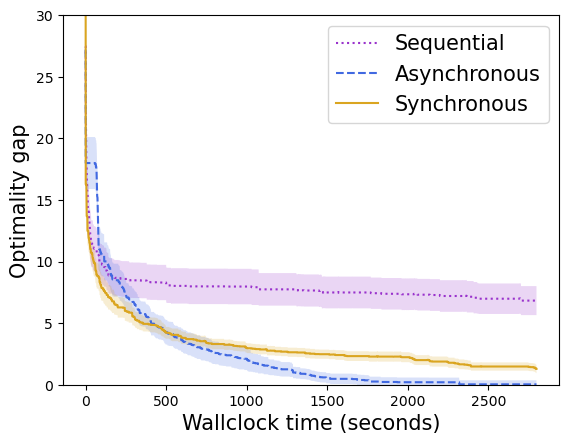

In [28]:
x = np.arange(0,2800)
fig,ax = plt.subplots()
ax.plot(seq_output_vs_time_mean, label = 'Sequential', color='darkorchid', linestyle=':')
ax.fill_between(x,seq_output_vs_time_mean-2*seq_output_vs_time_var/np.sqrt(96), \
    seq_output_vs_time_mean+2*seq_output_vs_time_var/np.sqrt(96), alpha=0.2, facecolor='darkorchid')
ax.plot(asyn_output_vs_time_mean-1, label = 'Asynchronous', color='royalblue', linestyle='--')
ax.fill_between(x,asyn_output_vs_time_mean-1-2*asyn_output_vs_time_var/np.sqrt(50), \
    asyn_output_vs_time_mean-1+2*asyn_output_vs_time_var/np.sqrt(50), alpha=0.2, facecolor='royalblue')
ax.plot(syn_output_vs_time_mean, label = 'Synchronous', color='goldenrod')
ax.fill_between(x,syn_output_vs_time_mean-2*syn_output_vs_time_var/np.sqrt(50), \
    syn_output_vs_time_mean+2*syn_output_vs_time_var/np.sqrt(50), alpha=0.2, facecolor='goldenrod')
ax.set_xlabel('Wallclock time (seconds)', fontsize = 15)
ax.set_ylabel('Optimality gap', fontsize = 15)
ax.set_ylim([0,30])

ax.legend(fontsize=15)
plt.savefig('comparison_time_3alg.png')

[[3.99265837e+01 1.11615924e-01 6.31231467e-02 1.95817246e-02]]


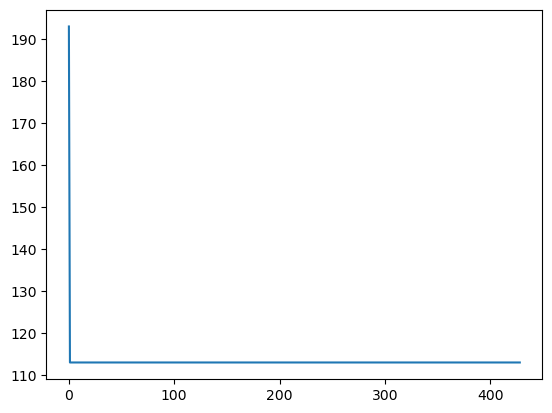

In [103]:
# open a file, where you stored the pickled data
file = open('seed_3', 'rb')

# dump information to that file
cur = pickle.load(file)

# close the file
file.close()

print(cur.tau)
plt.plot(cur.opt_reg[:,0])
# plt.savefig('cur_optimal_region.png')
# plt.close()

[[1.00000000e-06 1.64647252e-01 2.56842357e-01 4.25279681e-02]]


/Users/xinru/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 24037 (\N{CJK UNIFIED IDEOGRAPH-5DE5}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/xinru/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20316 (\N{CJK UNIFIED IDEOGRAPH-4F5C}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/xinru/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 26102 (\N{CJK UNIFIED IDEOGRAPH-65F6}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/xinru/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 38388 (\N{CJK UNIFIED IDEOGRAPH-95F4}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/xinru/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 21644 (\N{CJK UNIFIED IDEOGRAPH-548C})

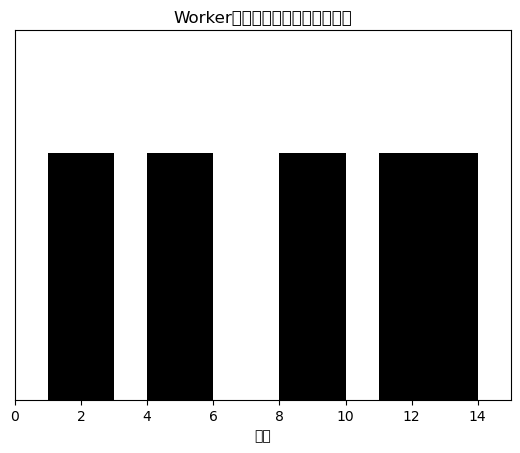

In [39]:
import matplotlib.pyplot as plt

# 示例数据
receive_times = [1, 4, 8, 11]
send_times = [3, 6, 10, 14]

# 创建图和轴
fig, ax = plt.subplots()

# 计算工作时间和空闲时间的开始点和持续时间
work_starts = receive_times
work_durations = [send - recv for recv, send in zip(receive_times, send_times)]

# 工作时间
for start, duration in zip(work_starts, work_durations):
    ax.broken_barh([(start, duration)], (0, 10), facecolors='black')

# 计算空闲时间
idle_starts = [send_times[i-1] for i in range(1, len(send_times))]
idle_durations = [recv - send for recv, send in zip(receive_times[1:], send_times[:-1])]

# 空闲时间
for start, duration in zip(idle_starts, idle_durations):
    ax.broken_barh([(start, duration)], (0, 10), facecolors='white')

# 设置图的参数
ax.set_ylim(0, 15)
ax.set_xlim(0, 15)
ax.set_xlabel('时间')
ax.set_yticks([])
ax.set_title('Worker工作时间和空闲时间示意图')

# 显示图表
plt.show()


63 63
62 62
60 60
62 62
63 63
65 65
64 64
382 382


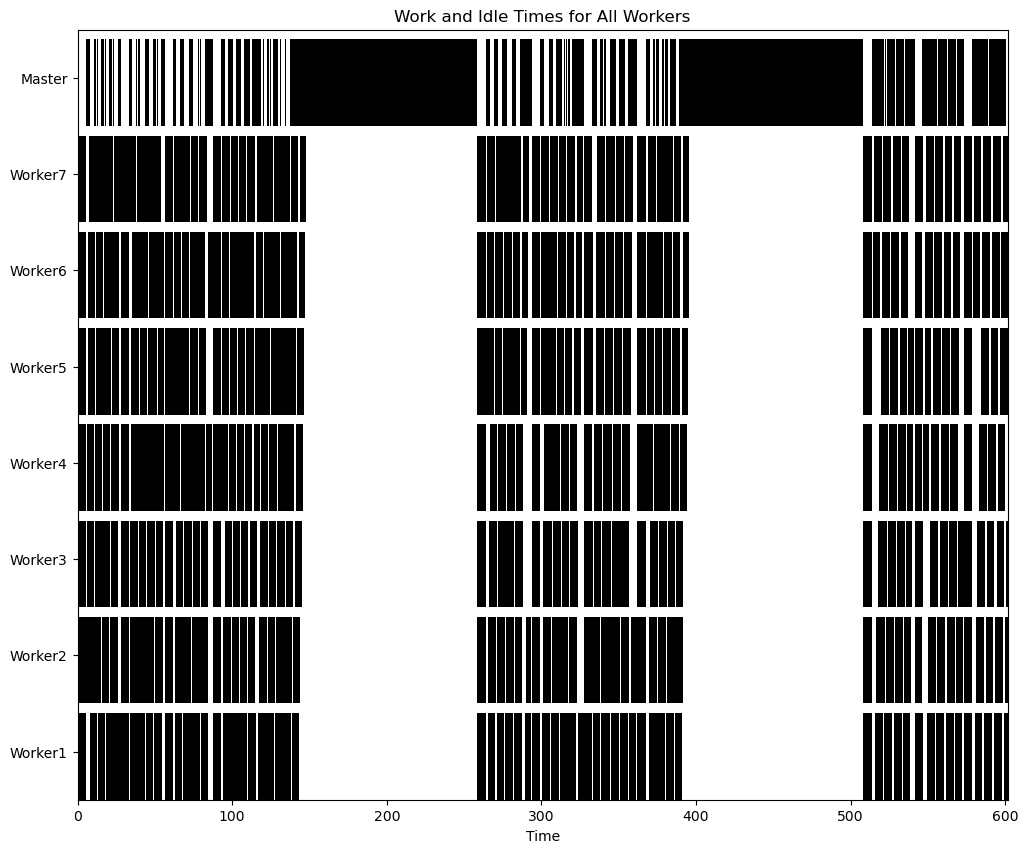

In [27]:
import pickle
import matplotlib.pyplot as plt

# Example data for each worker, lists of start times for receiving and sending tasks
receive_times = []
send_times = []

# open a file, where you stored the pickled data
for i in range(8):
    file = open('rank%stime' %str(i), 'rb')
    # dump information to that file
    time = pickle.load(file)
    # close the file
    file.close()
    
    cur_rec = time[0]
    cur_send = time[1]
    if i == 7:
        cur_rec = cur_rec[:-1]
        cur_send = cur_send[1:]
    
    # else:
    receive_times.append(cur_rec)
    send_times.append(cur_send)

    print(len(cur_rec), len(cur_send))

# 创建图和轴
fig, ax = plt.subplots(figsize=(12, 10))  # 调整图的大小以适应更多worker

# 处理每个worker的数据
for idx, (recvs, sends) in enumerate(zip(receive_times, send_times)):
    # 工作时间
    work_durations = [send - recv for recv, send in zip(recvs, sends)]
    work_starts = recvs
    ax.broken_barh([(start, duration) for start, duration in zip(work_starts, work_durations)], (idx*10, 9), facecolors='black')
    
    # # 空闲时间
    # idle_starts = [sends[i-1] for i in range(1, len(sends))]
    # idle_durations = [recv - send for recv, send in zip(recvs[1:], sends[:-1])]
    # ax.broken_barh([(start, duration) for start, duration in zip(idle_starts, idle_durations)], (idx*10, 9), facecolors='white')

# 设置图的参数
ax.set_ylim(0, 80)  # 增加y轴的范围
ax.set_xlim(0, max(max(send_times)) + 1)
ax.set_xlabel('Time')
ax.set_yticks([5 + i * 10 for i in range(8)])  # 调整y轴的ticks
ax.set_yticklabels(["Worker1", "Worker2", "Worker3", "Worker4", "Worker5",\
    "Worker6", "Worker7", 'Master'])  # 更新标签以包括所有worker
ax.set_title('Work and Idle Times for All Workers')

# 显示图表
plt.show()


95 95
95 95
98 98
[3.687425136566162, 4.289955139160156, 4.524134159088135, 7.581001281738281, 7.848365068435669, 8.090001106262207, 11.178817987442017, 11.769237041473389, 11.996163129806519, 15.075108051300049, 15.306238174438477, 15.54085922241211, 18.67824411392212, 18.934250116348267, 19.205844163894653, 26.329788208007812, 26.562655210494995, 27.16485023498535, 29.982643127441406, 30.575667142868042, 30.830486059188843, 33.600786209106445, 34.18250107765198, 34.45243811607361, 37.244529247283936, 37.8242871761322, 38.111156940460205, 40.93842816352844, 41.54204726219177, 41.778345346450806, 45.01815605163574, 45.27289700508118, 45.85259532928467, 52.289369106292725, 52.52011704444885, 52.75301814079285, 55.98904609680176, 56.30294227600098, 56.5438392162323, 59.8273651599884, 60.18497824668884, 60.428788900375366, 63.651000022888184, 64.05017900466919, 64.2967631816864, 67.42764115333557, 68.05022621154785, 68.68080997467041, 71.55913591384888, 72.19340515136719, 72.8544209003448

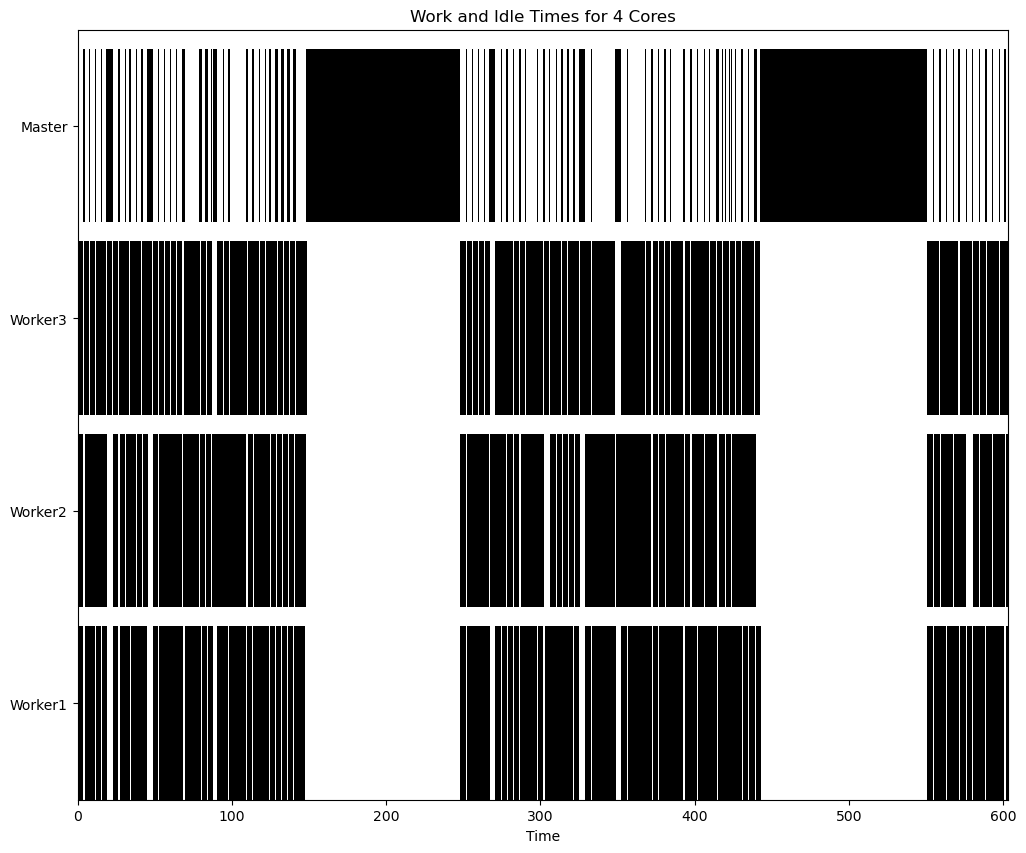

In [25]:
import pickle
import matplotlib.pyplot as plt

# Example data for each worker, lists of start times for receiving and sending tasks
receive_times = []
send_times = []

# open a file, where you stored the pickled data
for i in range(4):  # Change the range to 4 for 4 cores
    file = open('rank%stime' % str(i), 'rb')
    # dump information to that file
    time = pickle.load(file)
    # close the file
    file.close()
    
    cur_rec = time[0]
    cur_send = time[1]
    if i == 3:  # Adjust this if necessary based on your data specifics
        cur_rec = cur_rec[:-1]
        cur_send = cur_send[1:]
        # print(cur_rec)
        # print(cur_send)
    
    receive_times.append(cur_rec)
    send_times.append(cur_send)

    print(len(cur_rec), len(cur_send))

# Create figure and axes
fig, ax = plt.subplots(figsize=(12, 10))

# Process data for each worker
for idx, (recvs, sends) in enumerate(zip(receive_times, send_times)):
    # Work times
    work_durations = [send - recv for recv, send in zip(recvs, sends)]
    work_starts = recvs
    ax.broken_barh([(start, duration) for start, duration in zip(work_starts, work_durations)], (idx*10, 9), facecolors='black')

# Set graph parameters
ax.set_ylim(0, 40)  # Adjust y-axis range for 4 cores
ax.set_xlim(0, max(max(send_times)) + 1)
ax.set_xlabel('Time')
ax.set_yticks([5 + i * 10 for i in range(4)])  # Adjust y-axis ticks for 4 cores
ax.set_yticklabels(["Worker1", "Worker2", "Worker3", "Master"])  # Update labels for 4 cores
ax.set_title('Work and Idle Times for 4 Cores')

# Show the chart
plt.show()
